In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi

Mon Oct 21 19:50:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:03<00:00, 7530454.36it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 211752.73it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2099954.25it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21898861.05it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [6]:
# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Image batch dimensions: torch.Size([64, 1, 28, 28])
Label batch dimensions: torch.Size([64])


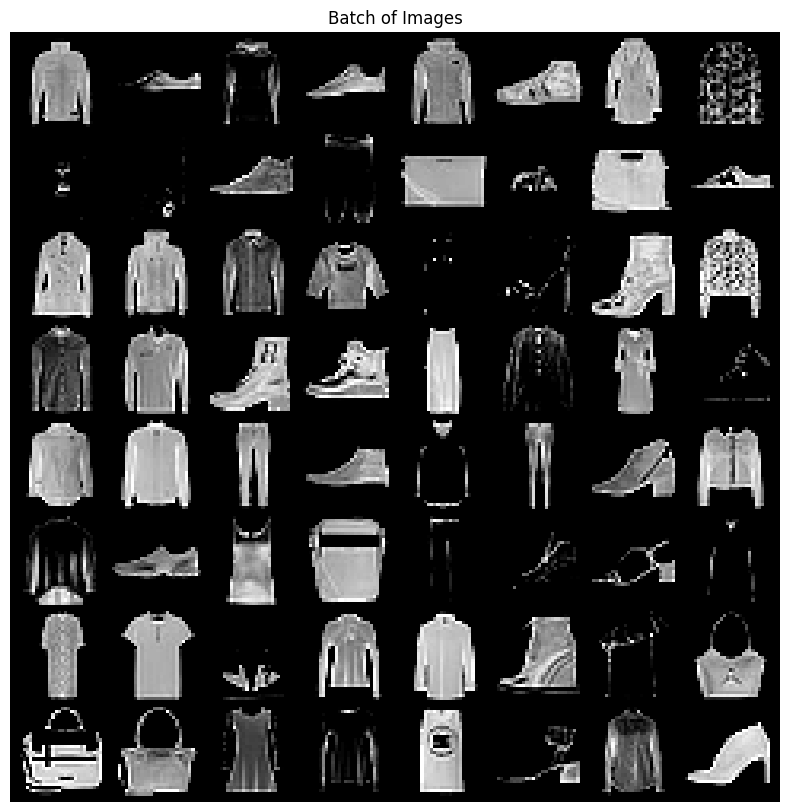

In [7]:
# Function to show a batch of images
def show_batch(images, labels):
    grid = torchvision.utils.make_grid(images, nrow=8)  # Display 8 images per row
    plt.figure(figsize=(10, 10))
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title("Batch of Images")
    plt.axis('off')
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Print the size of the batch and labels
print(f"Image batch dimensions: {images.shape}")
print(f"Label batch dimensions: {labels.shape}")


show_batch(images, labels)

In [8]:
# Define the CNN model
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [9]:
# Initialize the model, loss function, and optimizer
model = FashionCNN().to(device)  # Move model to GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
# Training loop
epochs = 30
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Training Complete!")

Epoch [1/30], Loss: 0.5714
Epoch [2/30], Loss: 0.3336
Epoch [3/30], Loss: 0.2799
Epoch [4/30], Loss: 0.2482
Epoch [5/30], Loss: 0.2258
Epoch [6/30], Loss: 0.2049
Epoch [7/30], Loss: 0.1890
Epoch [8/30], Loss: 0.1739
Epoch [9/30], Loss: 0.1637
Epoch [10/30], Loss: 0.1491
Epoch [11/30], Loss: 0.1380
Epoch [12/30], Loss: 0.1269
Epoch [13/30], Loss: 0.1206
Epoch [14/30], Loss: 0.1103
Epoch [15/30], Loss: 0.1062
Epoch [16/30], Loss: 0.0968
Epoch [17/30], Loss: 0.0917
Epoch [18/30], Loss: 0.0874
Epoch [19/30], Loss: 0.0822
Epoch [20/30], Loss: 0.0777
Epoch [21/30], Loss: 0.0747
Epoch [22/30], Loss: 0.0697
Epoch [23/30], Loss: 0.0695
Epoch [24/30], Loss: 0.0623
Epoch [25/30], Loss: 0.0622
Epoch [26/30], Loss: 0.0612
Epoch [27/30], Loss: 0.0588
Epoch [28/30], Loss: 0.0523
Epoch [29/30], Loss: 0.0531
Epoch [30/30], Loss: 0.0517
Training Complete!


In [11]:
# Evaluation loop
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy:.2f}%")

Accuracy on the test set: 91.43%
